<a href="https://colab.research.google.com/github/GIT-gmp/Task--6-AI-ML/blob/main/Copy_of_Welcome_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Confusion Matrix for k=1:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]



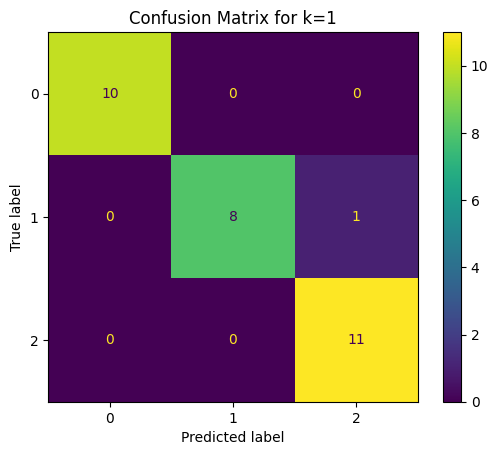

Confusion Matrix for k=3:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]



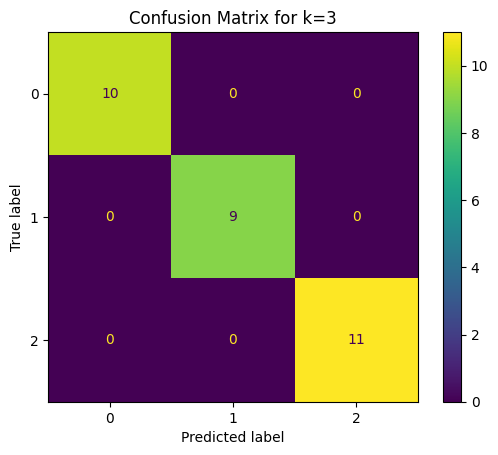

Confusion Matrix for k=5:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]



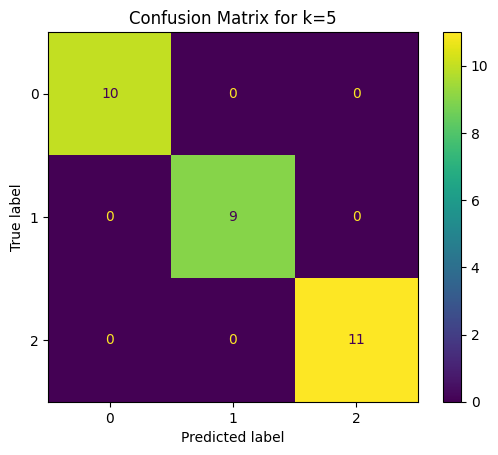

Confusion Matrix for k=7:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]



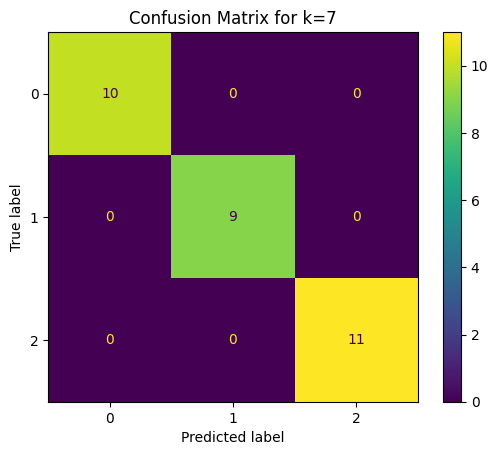

Confusion Matrix for k=9:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]



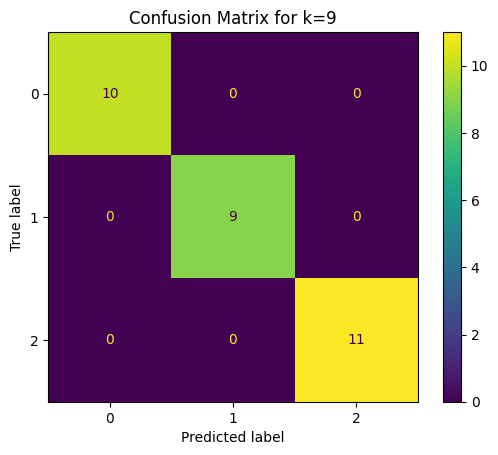

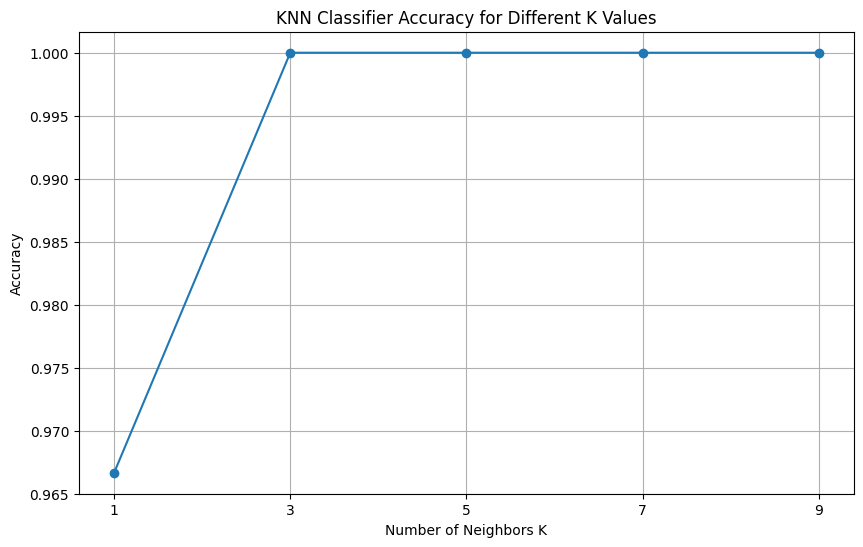

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load the Iris dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
column_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
data = pd.read_csv(url, header=None, names=column_names)

# Preprocess the data
# Encode the species labels
data['Species'] = data['Species'].astype('category').cat.codes

# Split the dataset into features and target variable
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values    # Target variable

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Experiment with different values of K
k_values = [1, 3, 5, 7, 9]
accuracies = []

for k in k_values:
    # Create KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for k={k}:\n{cm}\n")
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()
    plt.title(f'Confusion Matrix for k={k}')
    plt.show()

# Visualize the accuracy for different values of K
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Classifier Accuracy for Different K Values')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

# Removed the 2D decision boundary visualization code as it is not suitable for a 4-feature dataset.
# To visualize decision boundaries for a 4-feature dataset, techniques like PCA or
# selecting pairs of features for 2D plots would be needed, but a direct 2D meshgrid
# prediction with a 4-feature model is not appropriate.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
